In [ ]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import hvplot.pandas
%matplotlib inline
from sklearn import metrics
import seaborn as sns

In [ ]:
# Set the random seed for reproducibility
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [ ]:
# Read APPL.csv contains open, high, low, close, Adj close, Volume of Apple stock with twitter polarity scores and twitter volume
df = pd.read_csv('/content/AAPL.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop null values
df.dropna(inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,,,,,
2019-08-26,51.47,51.80,51.26,51.62,51.12,104174400,0.072340,888.0
2019-08-27,51.97,52.14,50.88,51.04,50.54,103493200,0.117541,962.0
2019-08-28,51.03,51.43,50.83,51.38,50.88,63755200,0.061477,895.0
2019-08-29,52.13,52.33,51.67,52.25,51.74,83962000,0.056460,1083.0
2019-08-30,52.54,52.61,51.80,52.19,51.67,84573600,0.106096,1005.0


In [ ]:
# pct change based on Adj close value
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume,Pct_change
Date,,,,,,,,,
2016-01-05,26.44,26.46,25.60,25.68,23.83,223164000,0.133635,1430.0,-0.024959
2016-01-06,25.14,25.59,24.97,25.17,23.36,273829600,0.072042,1949.0,-0.019723
2016-01-07,24.67,25.03,24.11,24.11,22.38,324377600,0.074369,2289.0,-0.041952
2016-01-08,24.64,24.78,24.19,24.24,22.50,283192000,0.051595,2235.0,0.005362
2016-01-11,24.74,24.76,24.33,24.63,22.86,198957600,0.019443,1222.0,0.016000


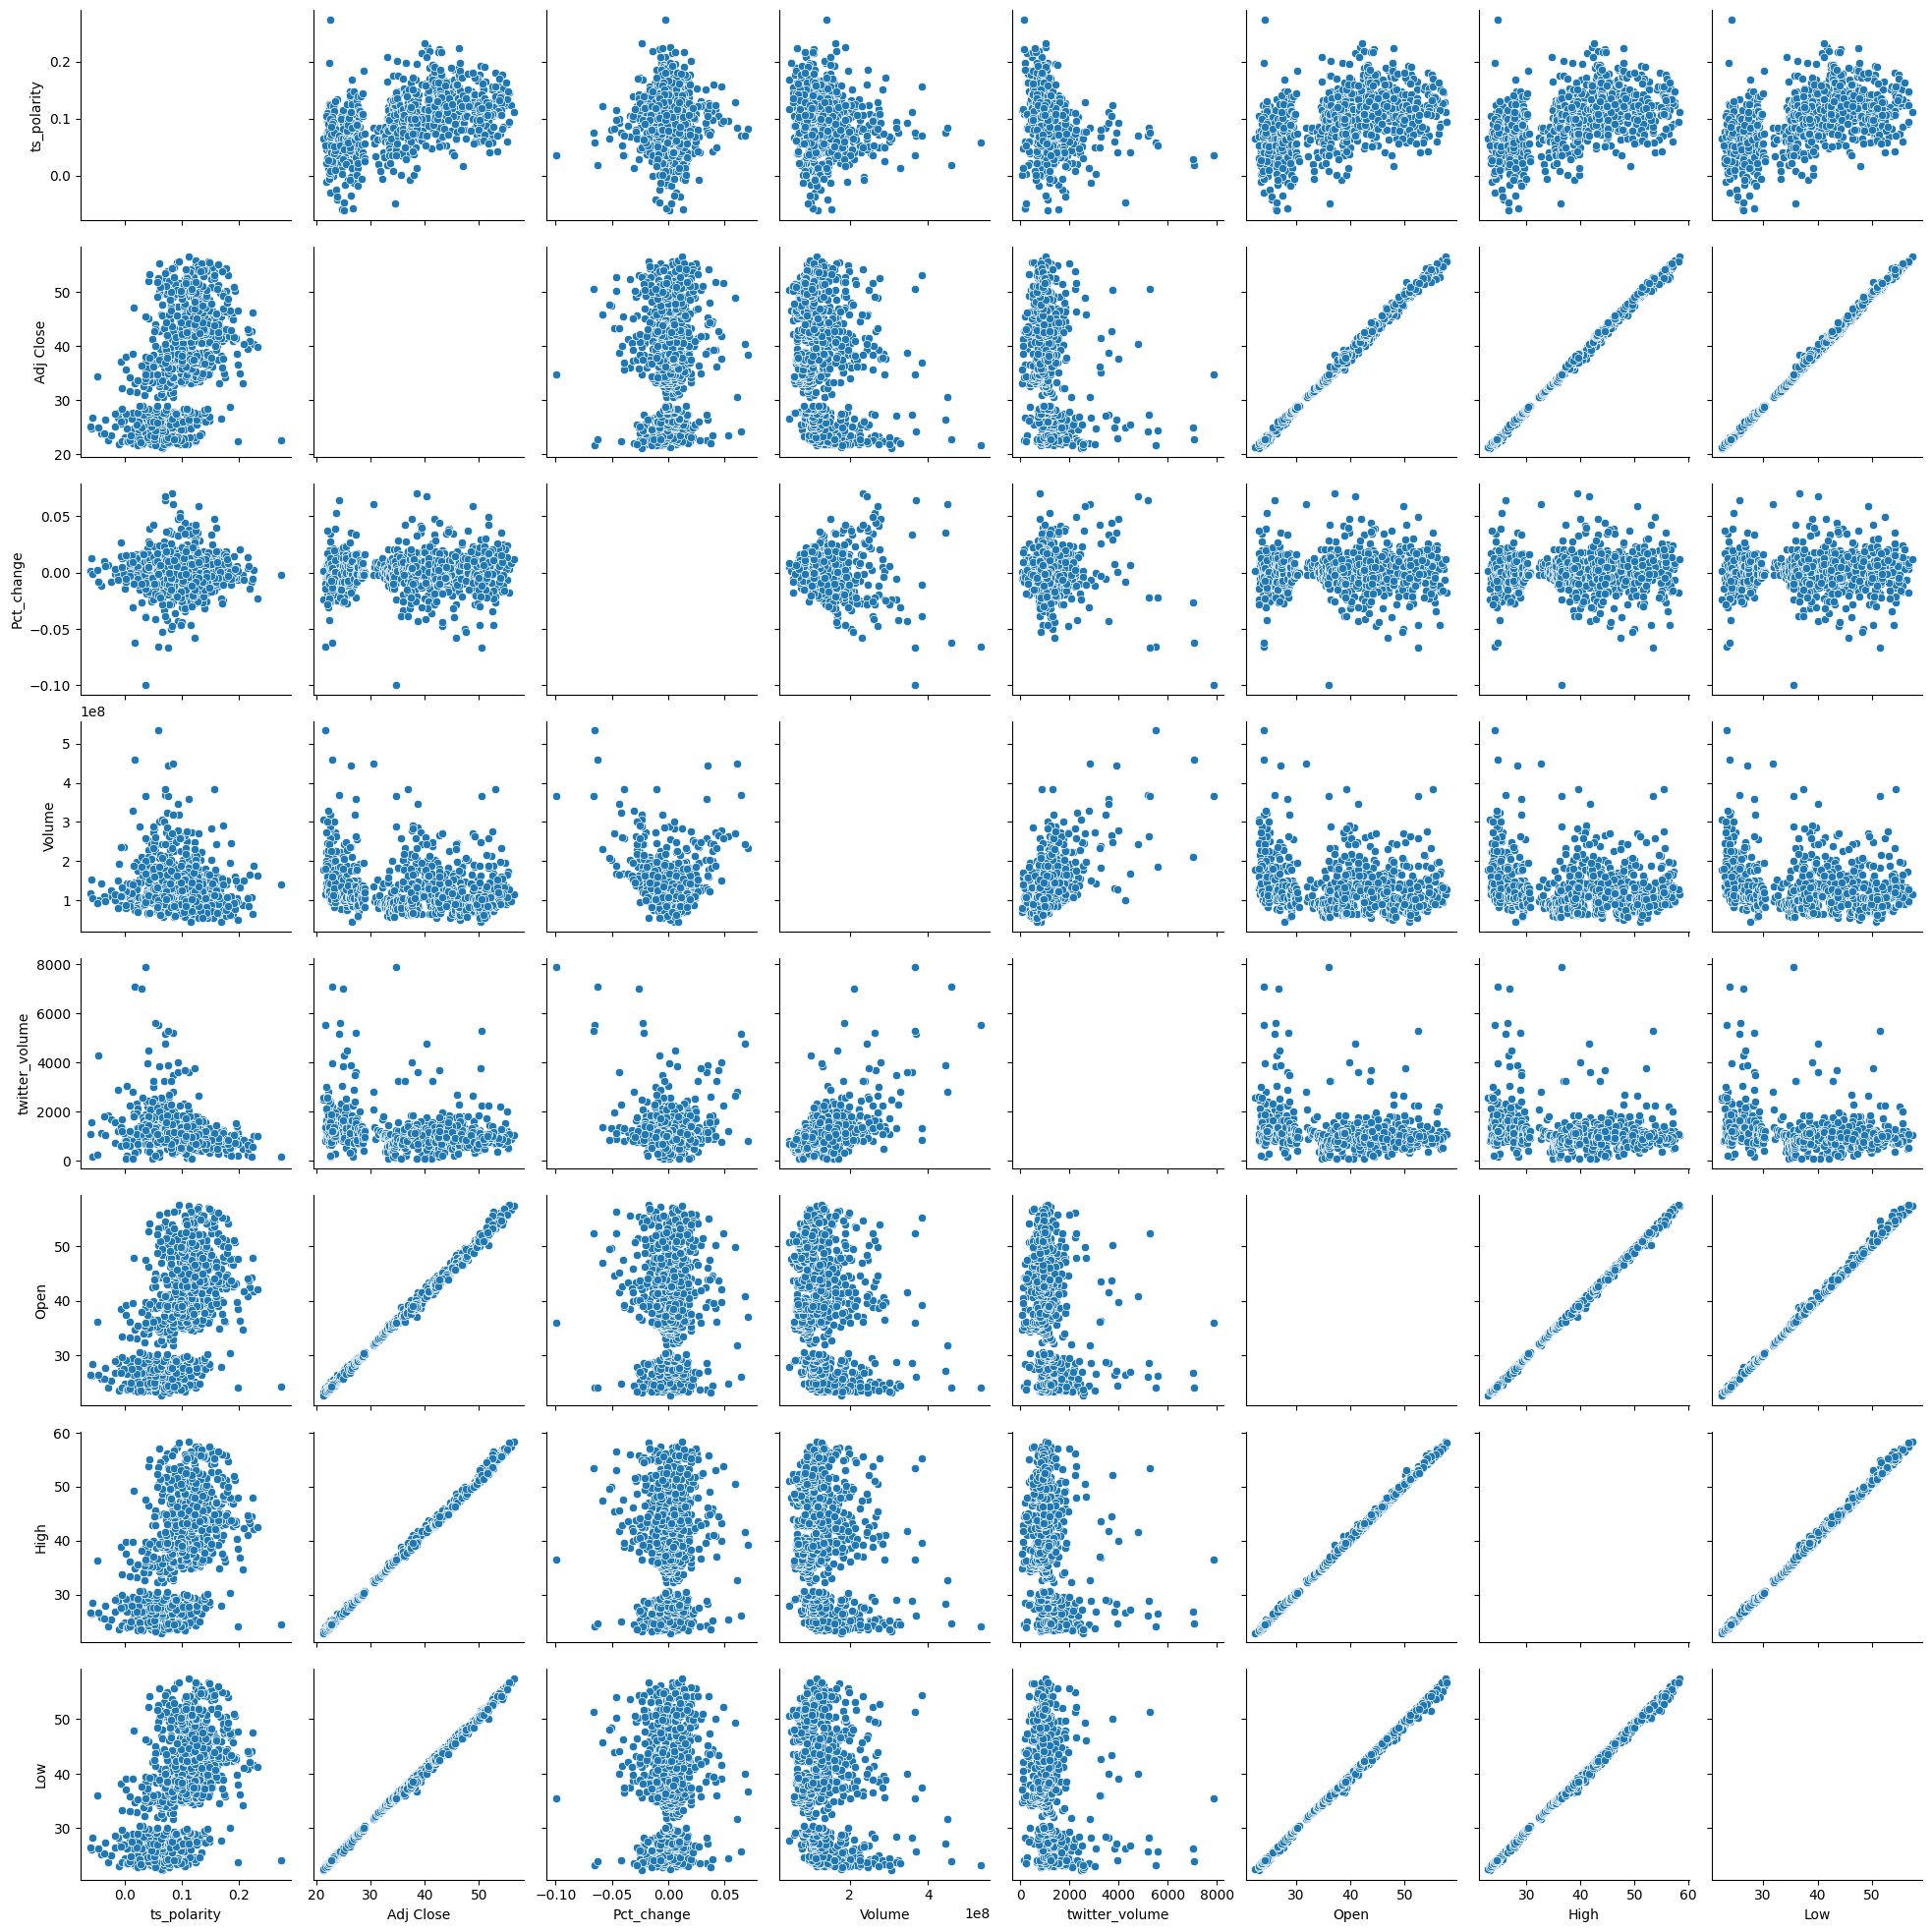

In [ ]:
sns.pairplot(df[['ts_polarity','Adj Close', 'Pct_change','Volume', 'twitter_volume', 'Open','High','Low']], diag_kind= "kd")

In [ ]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "ts_polarity", "twitter_volume", "Pct_change"]]
df.head()

,Adj Close,ts_polarity,twitter_volume,Pct_change
Date,,,,
2016-01-05,23.83,0.133635,1430.0,-0.024959
2016-01-06,23.36,0.072042,1949.0,-0.019723
2016-01-07,22.38,0.074369,2289.0,-0.041952
2016-01-08,22.50,0.051595,2235.0,0.005362
2016-01-11,22.86,0.019443,1222.0,0.016000


In [ ]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    X_volume = []
    y = []
    for i in range(len(df) - window):

        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]

        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)

    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

In [ ]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

<b> MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

<b> Reshaping data

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

<b> define LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()

number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )

model.add(Dropout(dropout_fraction))

# Layer 2
# The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

<b> Compilation

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 9)              396       
                                                                 
 dropout (Dropout)           (None, 9, 9)              0         
                                                                 
 lstm_1 (LSTM)               (None, 9, 9)              684       
                                                                 
 dropout_1 (Dropout)         (None, 9, 9)              0         
                                                                 
 lstm_2 (LSTM)               (None, 9)                 684       
                                                                 
 dropout_2 (Dropout)         (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=5, verbose=1)

Epoch 1/10
129/129 [==============================] - 9s 13ms/step - loss: 0.0165
Epoch 2/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0612
Epoch 3/10
129/129 [==============================] - 2s 15ms/step - loss: 0.0526
Epoch 4/10
129/129 [==============================] - 3s 19ms/step - loss: 0.0404
Epoch 5/10
129/129 [==============================] - 2s 15ms/step - loss: 0.0262
Epoch 6/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0171
Epoch 7/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0113
Epoch 8/10
129/129 [==============================] - 2s 13ms/step - loss: 0.0120
Epoch 9/10
129/129 [==============================] - 2s 12ms/step - loss: 0.0097
Epoch 10/10
129/129 [==============================] - 2s 12ms/step - loss: 0.0098


<B> saving model

In [ ]:
model.save('Apple_Twitter_analysis_Stockprice_LSTM_RNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<b> Model Evaluation

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('/content/Apple_Twitter_analysis_Stockprice_LSTM_RNN.h5')

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 2s 6ms/step - loss: 0.0156


0.015626538544893265

In [ ]:
model_new = tf.keras.models.load_model('/content/Apple_Stockprice_LSTM.h5')
predict_other = model.predict(X_test)

9/9 [==============================] - 2s 5ms/step


In [ ]:
predicted = model.predict(X_test)

9/9 [==============================] - 1s 4ms/step


In [ ]:
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.1250061607767967
R-squared : 0.7190122061101436


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices_new = y_test_scaler.inverse_transform(predict_other)
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel(),
    "Predicted_LSTM": predicted_prices_new.ravel()
}, index = df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted,Predicted_LSTM
Date,,,
2018-07-27,46.39,51.197483,35.136921
2018-07-30,46.13,49.691864,35.110027
2018-07-31,46.22,50.388580,35.124298
2018-08-01,48.95,49.284966,35.107620
2018-08-02,50.38,50.216103,35.121220


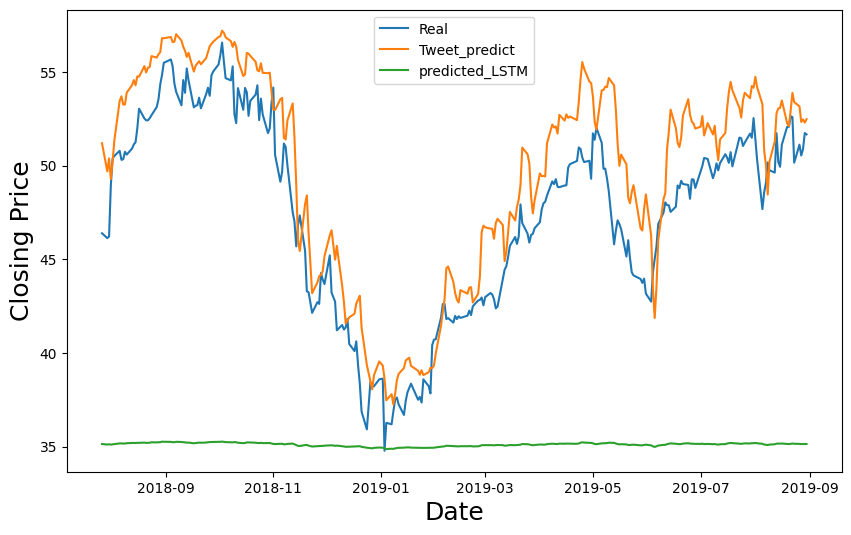

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(stocks['Real'])
plt.plot(stocks['Predicted'])
plt.plot(stocks['Predicted_LSTM'])
plt.legend(['Real','Tweet_predict','predicted_LSTM'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)
plt.show()